# Demo tương tác với mô hình SVM

In [1]:
# import các thư viện cần thiết
from ipywidgets import interact, interactive, IntSlider, Layout
import ipywidgets as widgets
from IPython.display import display

import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

## SVM và bài toán Phân lớp

### Đóng gói SVM trong một hàm

In [2]:
def plot_contours(ax, clf, xx, yy, **params):
    """Biểu diễn biên quyết định của bộ phân lớp SVC.

    Tham số
    ----------
    ax: Đối tượng subplot của matplotlib
    clf: Bộ phân lớp
    xx: Tọa độ theo trục tung 
    yy: Tọa độ theo trục hoành
    params: Thư viện tham số ứng với hàm contourf
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [3]:
def make_meshgrid(x, y, h=.02):
    """Tạo ra lưới các điểm để biểu diễn

    Tham số
    ----------
    x: dữ liệu trên trục X
    y: dữ liệu trên trục Y
    h: kích cỡ một mắt lưới

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [4]:
def svm_fit(kernel, C, test_size):
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size,random_state=101)
    clf = svm.SVC(C=C, kernel=kernel, probability=True)
    clf.fit(X_train,y_train)
    
    train_pred = np.array(clf.predict(X_train))
    train_score = clf.score(X_train,y_train)
    
    test_pred = np.array(clf.predict(X_test))
    test_score = clf.score(X_test,y_test)
    
    
    # Cài đặt lưới 1x2 để biểu diễn dữ liệu
    fig, sub = plt.subplots(1,2)
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    
    titles = ['Training data acc: %.2f' %(train_score), 
              'Test data acc: %.2f' %(test_score)]
    datas = [X_train, X_test]
    labels = [y_train, y_test]
    
    for data, label, title, ax in zip(datas, labels, titles, sub.flatten()):
        # biểu diễn mô hình trong không gian 2 chiều với 2 đặc trưng
        X0, X1 = data[:, 0], data[:, 1]
        xx, yy = make_meshgrid(X0, X1)
        plot_contours(ax, clf, xx, yy,
                      cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X0, X1, c=label, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel('Sepal length')
        ax.set_ylabel('Sepal width')
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)

    plt.show()

    return (train_score,test_score)

### Xây dựng hàm đóng gói có tương tác với ipywidget

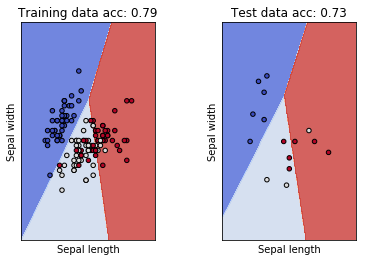

In [5]:
# import datasets và mô hình SVM
from sklearn import svm, datasets

# import công cụ hỗ trợ chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
from sklearn.model_selection import train_test_split

# tải dữ liệu từ datasets
iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target

from ipywidgets import HBox, Label, FloatSlider

style = {'description_width': 'initial'}

lb1 = Label(value="Play with options and watch the probability space evolve dynamically. \
Remember, smaller the value of $C$, stronger the regularization strength",fontsize=15)

svm_model=interactive(svm_fit,
                      kernel=widgets.RadioButtons(options=['linear', 'poly', 'rbf', 'sigmoid'],
                                                  description = 'Kernel Type'),
                      C=FloatSlider(value=0.1,min=0.1,max=2,step=0.1,
                                    description='Regularization ($10^{-C}$), $C$', style=style,
                                    continuous_update=False),
                      test_size=FloatSlider(value=0.1,min=0.1,max=0.5,step=0.1,
                                            description = 'Test fraction ($X_{test}$)', style=style))

# Hiển thị mô hình với khả năng tương tác
display(lb1)
display(svm_model)